<a href="https://colab.research.google.com/github/ilikemichael/ml1216/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [2]:
# mnist: 必須要reshape(6000, 28, 28, 1), 注意這裡跟MLP不一樣, 這裡面是一個list, 裡面只有一個
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"     
]

airplane


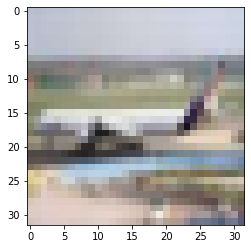

In [4]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
print(labels[y_train[idx][0]])
plt.imshow(x_train[idx])

In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    #1個filter(3 * 3 * 3) * 64個深度 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1(3 * 3 * 64) * 128個 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [6]:

x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [7]:

from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [8]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("model.h5", save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_norm, 
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 10s - loss: 1.5705 - accuracy: 0.4271 - val_loss: 1.2415 - val_accuracy: 0.5608
Epoch 2/50
225/225 - 3s - loss: 1.1384 - accuracy: 0.5961 - val_loss: 0.9823 - val_accuracy: 0.6542
Epoch 3/50
225/225 - 3s - loss: 0.9342 - accuracy: 0.6719 - val_loss: 0.8109 - val_accuracy: 0.7214
Epoch 4/50
225/225 - 3s - loss: 0.8003 - accuracy: 0.7206 - val_loss: 0.7526 - val_accuracy: 0.7416
Epoch 5/50
225/225 - 3s - loss: 0.6909 - accuracy: 0.7599 - val_loss: 0.7422 - val_accuracy: 0.7484
Epoch 6/50
225/225 - 3s - loss: 0.6149 - accuracy: 0.7882 - val_loss: 0.6786 - val_accuracy: 0.7678
Epoch 7/50
225/225 - 3s - loss: 0.5359 - accuracy: 0.8128 - val_loss: 0.6728 - val_accuracy: 0.7806
Epoch 8/50
225/225 - 3s - loss: 0.4614 - accuracy: 0.8386 - val_loss: 0.6918 - val_accuracy: 0.7802
Epoch 9/50
225/225 - 3s - loss: 0.3920 - accuracy: 0.8609 - val_loss: 0.6842 - val_accuracy: 0.7754
Epoch 10/50
225/225 - 3s - loss: 0.3240 - accuracy: 0.8877 - val_loss: 0.6947 - val_accuracy: 0.785

In [9]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.7661


[0.6993628144264221, 0.7660999894142151]